In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [4]:
path = '/content/gdrive/Shareddrives/DS Capstone/base_baf_final.csv'
df = pd.read_csv(path)
df = df.drop(["source", "device_os"], axis = 1)

In [5]:
# Separate features and target variable
y = df['fraud_bool']
X = df.drop(columns=['fraud_bool'])

In [6]:
# Split full dataset into temp_train and test
X_temp_train, X_test, y_temp_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# From temp_train, split out calibration and final training set
X_calibrate, X_train, y_calibrate, y_train = train_test_split(
    X_temp_train, y_temp_train, train_size=1000, stratify=y_temp_train, random_state=150)

In [7]:
# Initialize and train the Random Forest model with class balancing
rf_model = RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train) # took 12.5 mins

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [8]:
# Make predictions using probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get fraud class probabilities
threshold = 0.3  # Lower threshold to increase fraud detection
y_pred = (y_pred_proba > threshold).astype(int)

In [9]:
# Evaluate the model
from sklearn.metrics import balanced_accuracy_score
accuracy = accuracy_score(y_test, y_pred)

balanced = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"balanced acc: {balanced: .2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Precision: 0.35
Recall: 0.02
F1-score: 0.04
balanced acc:  0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.35      0.02      0.04      2109

    accuracy                           0.99    200000
   macro avg       0.67      0.51      0.52    200000
weighted avg       0.98      0.99      0.98    200000



In [10]:
probs_calib = rf_model.predict_proba(X_calibrate)

# Take the probability the model assigned to the *correct* label
true_class_probs = probs_calib[np.arange(len(y_calibrate)), y_calibrate]

# The conformal score is 1 - confidence in the true label
conformal_scores = 1 - true_class_probs


In [11]:
np.unique(conformal_scores)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.9 , 0.94, 0.96, 0.98, 1.  ])

In [12]:
print(np.array_equal(y_calibrate, probs_calib))

False


In [13]:
import numpy as np
import pandas as pd

#theres a bug in the code here bc of which youre getting blank prediction sets {}

# Predict probabilities on test set
probs_test = rf_model.predict_proba(X_test)
#print("probs_test", probs_test) #wh

# Choose a threshold quantile from calibration scores (90% confidence)
alpha = 0.1  # 1 - 0.9
threshold = np.quantile(conformal_scores, 1 - alpha)

# Make predictions and build prediction sets
prediction_sets = []
class_labels = rf_model.classes_  # should be [0, 1]

all_sets = [] # masterclass of all the cf sets
# |test - prediction| <= threshold (q-hat)
for prob in probs_test:
  conformal_set = []
  #print("prob", prob)
  if prob[0] > 0 and (0 - prob[0] <= threshold): #if not fraud is above the threshold
    conformal_set.append("not fraud")
    conformal_set.append(float(prob[0]))
  if prob[1] >0 and (1 - prob[1] <= threshold): #if fraud is above the threshold
    conformal_set.append("fraud")
    conformal_set.append(float(prob[1]))
  all_sets.append(conformal_set)
  #print(conformal_set) # the set of predictions [fraud, not fraud]. the number with this is the confidence that is given from the rf model NOT cf

all_sets = []

for prob in probs_test:
    conformal_set = []

    if abs(0 - prob[0]) <= threshold:  # if "not fraud" within threshold
        conformal_set.append("not fraud")
    if abs(1 - prob[1]) <= threshold:  # if "fraud" within threshold
        conformal_set.append("fraud")

    all_sets.append(conformal_set)
    print(conformal_set)

# Now see unique prediction sets
np.unique(conformal_scores)

Streaming output truncated to the last 5000 lines.
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.9 , 0.94, 0.96, 0.98, 1.  ])

In [14]:
probs_test = rf_model.predict_proba(X_test)


probs_calib = rf_model.predict_proba(X_calibrate)
true_class_probs = probs_calib[np.arange(len(y_calibrate)), y_calibrate]
conformal_scores = 1 - true_class_probs

alpha = 0.3  # 90% confidence
threshold = np.quantile(conformal_scores, 1 - alpha)
print("Threshold:", threshold)

all_sets = []

for prob in probs_test:
    conformal_set = []

    if 1 - prob[0] <= threshold:
        conformal_set.append("not fraud")
    if 1 - prob[1] <= threshold:
        conformal_set.append("fraud")

    all_sets.append(conformal_set)
    #print(conformal_set)

unique_sets = set(tuple(sorted(x)) for x in all_sets)
print("Unique conformal sets:", unique_sets)



Threshold: 0.020000000000000018
Unique conformal sets: {(), ('not fraud',)}


In [15]:
print("Threshold:", threshold)
for i, prob in enumerate(probs_test[:10]):
    print(f"Row {i}: P(not fraud) = {prob[0]:.3f}, P(fraud) = {prob[1]:.3f}")
    print(f"abs(0 - P(not fraud)) = {abs(0 - prob[0]):.3f}")
    print(f"abs(1 - P(fraud))     = {abs(1 - prob[1]):.3f}")
    print("-------")

Threshold: 0.020000000000000018
Row 0: P(not fraud) = 0.980, P(fraud) = 0.020
abs(0 - P(not fraud)) = 0.980
abs(1 - P(fraud))     = 0.980
-------
Row 1: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(not fraud)) = 1.000
abs(1 - P(fraud))     = 1.000
-------
Row 2: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(not fraud)) = 1.000
abs(1 - P(fraud))     = 1.000
-------
Row 3: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(not fraud)) = 1.000
abs(1 - P(fraud))     = 1.000
-------
Row 4: P(not fraud) = 0.980, P(fraud) = 0.020
abs(0 - P(not fraud)) = 0.980
abs(1 - P(fraud))     = 0.980
-------
Row 5: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(not fraud)) = 1.000
abs(1 - P(fraud))     = 1.000
-------
Row 6: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(not fraud)) = 1.000
abs(1 - P(fraud))     = 1.000
-------
Row 7: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(not fraud)) = 1.000
abs(1 - P(fraud))     = 1.000
-------
Row 8: P(not fraud) = 1.000, P(fraud) = 0.000
abs(0 - P(

In [16]:
for prob in probs_test:
  conformal_set = []
  is_fraud = False
  if prob[0] > 0 and (0 - prob[0] <= threshold):
    conformal_set.append("not fraud")
    conformal_set.append(float(prob[0]))
  if prob[1] > 0 and (1 - prob[1] <= threshold):
    conformal_set.append("fraud")
    conformal_set.append(float(prob[1]))
    is_fraud = True
  all_sets.append(conformal_set)
  if is_fraud:
    print(conformal_set)

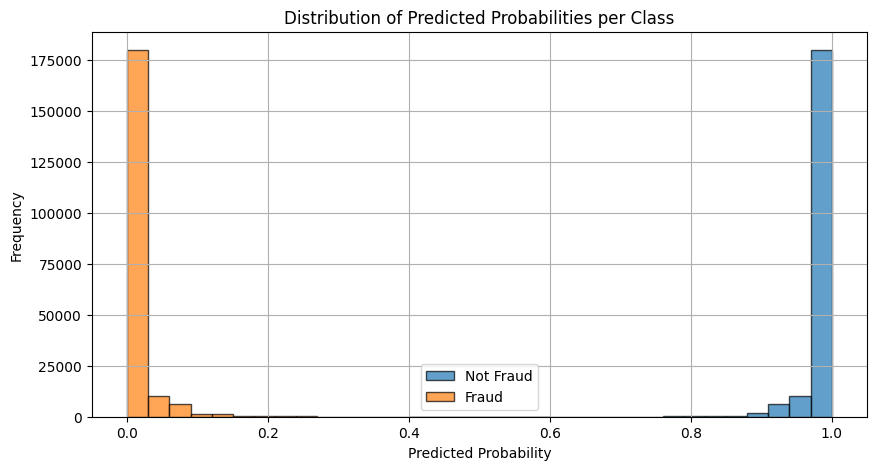

In [17]:
# Assuming binary classification: class 0 = not_fraud, class 1 = fraud
not_fraud_probs = probs_test[:, 0]
fraud_probs = probs_test[:, 1]

plt.figure(figsize=(10, 5))

plt.hist(not_fraud_probs, bins=20, alpha=0.7, label='Not Fraud', edgecolor='black')
plt.hist(fraud_probs, bins=20, alpha=0.7, label='Fraud', edgecolor='black')

plt.title("Distribution of Predicted Probabilities per Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Flatten, round to 2 decimals, and filter out 0.0 and 1.0
rounded_probs = np.round(probs_test.flatten(), 2)
filtered_probs = [p for p in rounded_probs if 0.0 < p < 1.0]

# Create a frequency table
freq_table = pd.Series(filtered_probs).value_counts().sort_index().reset_index()
freq_table.columns = ['Predicted Probability', 'Count']

# Display the table
print(freq_table)


    Predicted Probability  Count
0                    0.02  32886
1                    0.04  10083
2                    0.06   4148
3                    0.08   2105
4                    0.10   1201
5                    0.12    761
6                    0.14    508
7                    0.16    348
8                    0.18    236
9                    0.20    156
10                   0.22    129
11                   0.24     91
12                   0.26     63
13                   0.28     38
14                   0.30     34
15                   0.32     25
16                   0.34     19
17                   0.36     14
18                   0.38     18
19                   0.40     19
20                   0.42      9
21                   0.44      4
22                   0.46      6
23                   0.48      8
24                   0.50      8
25                   0.52      8
26                   0.54      6
27                   0.56      4
28                   0.58      9
29        